# Distributions:
Bir veri seti üzerinde çalışmaya başladığımızda ilk yapılması gereken verinin dağılımını bulmaktır ve ardından ham dataya 4 önemli soru sorulur:
* veri seti kategoriksel mi yoksa sürekli veri mi?
* Veri dağılımı simetrik mi? Yani, sol ve sağ değerleri ortalamaya eşit ya da eşite yakın mı?
* Verinin alt ve üst limitleri var mı?
* Veri dağılımı yapıldığında outliers değerler var mı?


1. Normal Dağılım : Ortalama değeri baz alınarak sağından ve solundan simetrik dağılmıştır
2. Bernoulli Dağılım
3. Binomial Dağılım
4. Uniform Dağılım

In [133]:
import numpy as pd
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import binom
import warnings
warnings.filterwarnings("ignore")

# Soru 1:
By using distribution=np.random.name_distribution([],[]), write the name of distribution of your choice in place of name_distributionand fill out the bracket with your choice again. Then please, a) Draw the histogram and interpret b) Draw Q-Q plot and interpret

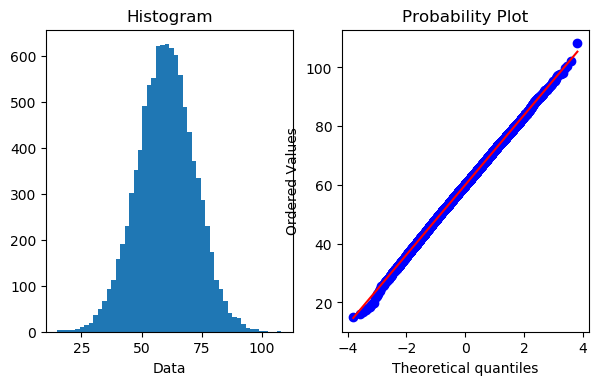

In [146]:
plt.figure(figsize=(7,4),dpi=100)

data=np.random.normal(60,12,10000)

plt.subplot(1,2,1)
plt.title("Histogram")
plt.xlabel("Data")
plt.hist(data, bins=50)

plt.subplot(1,2,2)
stats.probplot(data , dist='norm', plot=plt)

plt.show()

# Soru 2:
Get the google stock quotes from 2015-2017 using https://finance.yahoo.com/. Using this data, calculate the stock return with the following formula:

Pt−Pt−1/Pt−1
 
where  Pt  represents the stock price at time t and  Pt−1  denotes the stock price at time t-1. What do you think about the return distribution?

Note: Data is retrieved from https://finance.yahoo.com/ as follows. After clicking the given address, type the name of the stock you want to search in the search section (eg google). Click on the search result below to go to the relevant stock. When you get to the page with the relevant stock information, click the Historical Prices tab, select the relevant date range, then click Apply. Finally, click the Download Data button to download the data. Alternative you can use yfinance library

In [110]:
!pip install yfinance

In [113]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore")

In [114]:
stock='AAPL'
start=datetime.datetime(2000,1,1)
end=datetime.datetime(2020,1,1)
apple=yf.download(stock,start=start,end=end, interval='1d')


[*********************100%***********************]  1 of 1 completed


In [115]:
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,3.604911,3.674107,3.553571,3.671875,3.173011,40952800
2000-01-03,3.745536,4.017857,3.631696,3.997768,3.454628,133949200
2000-01-04,3.866071,3.950893,3.613839,3.660714,3.163368,128094400
2000-01-05,3.705357,3.948661,3.678571,3.714286,3.209661,194580400
2000-01-06,3.790179,3.821429,3.392857,3.392857,2.931901,191993200


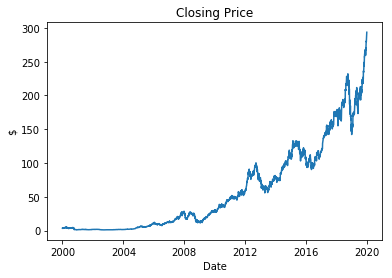

In [116]:
plt.plot(apple['Close'])
plt.title("Closing Price")
plt.xlabel("Date")
plt.ylabel("$")
plt.show()

In [117]:
apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5032.000000,5032.000000,5032.000000,5032.000000,5032.000000,5.032000e+03
mean,59.481987,60.040888,58.905360,59.492645,55.407277,1.149283e+08
std,64.751179,65.300631,64.233740,64.798910,62.943401,9.876937e+07
min,0.927857,0.942143,0.908571,0.937143,0.809822,9.835000e+06
25%,4.897768,4.981585,4.768075,4.885357,4.221629,4.722772e+07
50%,28.908571,29.236428,28.564285,28.898572,24.972392,8.731380e+07
75%,99.122501,100.248215,98.377502,99.460001,91.526022,1.516076e+08
max,291.119995,293.970001,289.519989,293.649994,291.638000,1.855410e+09


In [128]:
apple_return=apple['Close'].pct_change().dropna()
apple_return.head()

Date
2000-01-03    0.088754
2000-01-04   -0.084310
2000-01-05    0.014634
2000-01-06   -0.086538
2000-01-07    0.047368
Name: Close, dtype: float64

In [124]:
test_stats,p_value=stats.normaltest(apple_return)
print("The normal test statistic is {:.4f} and p value is {}:".format(test_stats,p_value))

The normal test statistic is 2726.5237 and p value is 0.0:


* H0 = Veri normal dağılmakta
* HA = Veri normal dağılmamakta

p değeri 0.05 in altındaysa anlamlıdır, HA dır.
Burada p değeri 0 çıktığı için 0.05 in altındadır HA seçilir.

In [125]:
import scipy.stats as stats
import pylab

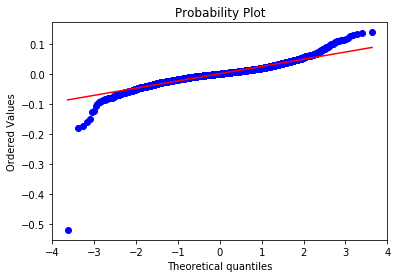

In [132]:
sorted_apple_return=apple_return.sort_values()
stats.probplot(sorted_apple_return, dist='norm', plot=pylab)
pylab.show()

 QQ Plot grafiğiyle verilerin fazla saptığını görmekteyiz.